<a href="https://colab.research.google.com/github/saikumartech/Customer-Churn-Prediction-Retention-Dashboard-/blob/main/Customer_Churn_Prediction_%26_Retention_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Customer Churn Prediction & Retention Dashboard

Welcome to the **Customer Churn Prediction & Retention Dashboard** project. This end-to-end data science solution aims to identify customers who are likely to stop using a service (churn) and provide actionable insights to help businesses retain them.

Problem Statement

In subscription-based industries like telecom, understanding customer churn is critical. Losing customers directly impacts revenue and growth. By analyzing historical customer data, we aim to:

- Predict the likelihood of churn for each customer.
- Identify key drivers behind customer churn.
- Visualize trends and customer segments to support decision-making.

Objectives

- Perform Exploratory Data Analysis (EDA) to understand the dataset.
- Build and evaluate machine learning models to predict churn.
- Visualize churn patterns with an interactive dashboard.
- Provide actionable insights for customer retention strategies.

Tools & Technologies

- **Python**: Data analysis and modeling
- **Pandas, NumPy, Seaborn, Matplotlib**: EDA and visualization
- **Scikit-learn**: Machine learning modeling
- **Streamlit / Power BI**: Interactive dashboard
- **Google Colab**: Notebook environment
- **GitHub**: Version control and project showcase

---


In [2]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Copy kaggle.json from Drive to ~/.kaggle
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/keys/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Install Kaggle CLI
!pip install -q kaggle

# Download the dataset
!kaggle datasets download -d blastchar/telco-customer-churn

# Unzip the dataset
!unzip telco-customer-churn.zip


Mounted at /content/drive
Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn
License(s): copyright-authors
Archive:  telco-customer-churn.zip
  inflating: WA_Fn-UseC_-Telco-Customer-Churn.csv  


What’s Next?

Data Loading & Initial Exploration

We’ll now:
Load the dataset using Pandas.
Preview the data: See the first few rows, understand columns, check the shape, and get a feel for the dataset.

In [3]:
import pandas as pd

# Load the dataset into a DataFrame
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show shape and first five rows
print("Shape:", df.shape)
df.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Get a concise summary of the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Count missing values in each column
df.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


SO NO MISSING VALUES NO NULL, DATA IS CLEAN AND SO WE ARE MOVING AHEAD WITH EDA!

In [6]:
# Look at column names and data types
df.dtypes


,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [7]:
# Check unique values in 'Churn' column
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


<ipython-input-8-97085dc7d07b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


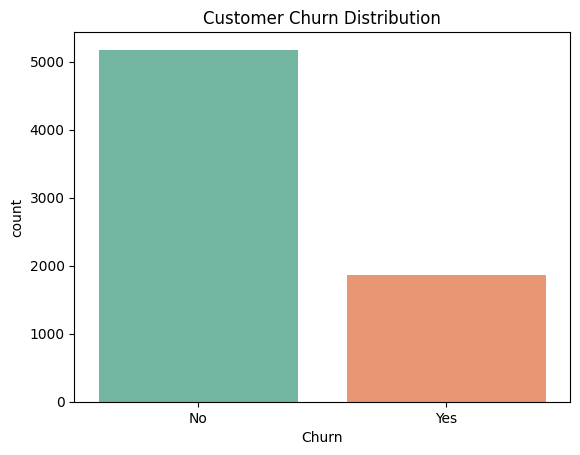

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot churn distribution
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()


Next Interpreatation

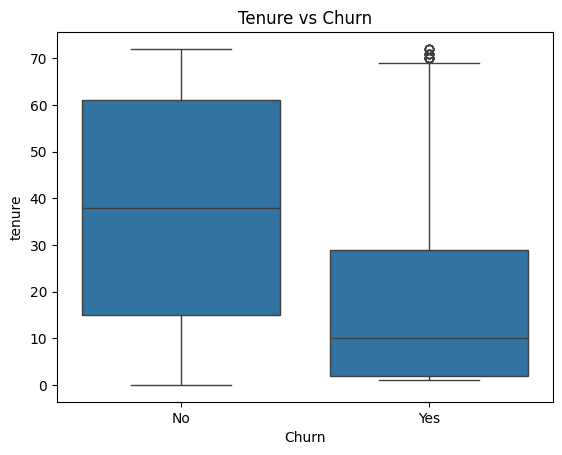

In [9]:
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title("Tenure vs Churn")
plt.show()


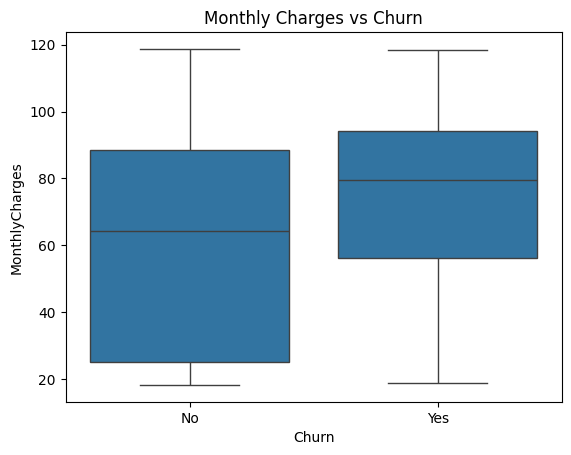

In [10]:
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title("Monthly Charges vs Churn")
plt.show()


Churn Rates By Categorical Columns


By Contact Type

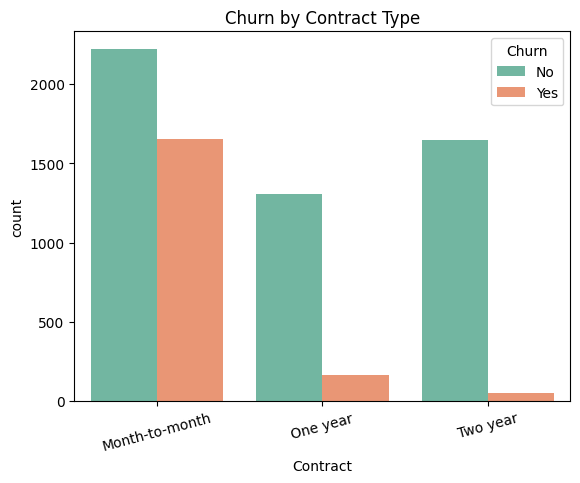

In [11]:
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title("Churn by Contract Type")
plt.xticks(rotation=15)
plt.show()


BY Payment Method

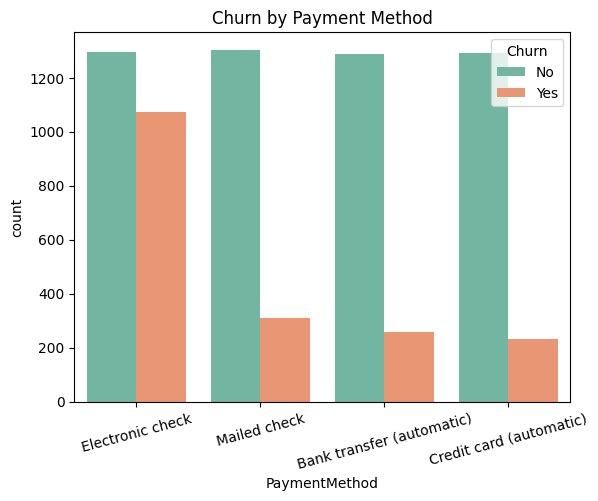

In [12]:
 sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title("Churn by Payment Method")
plt.xticks(rotation=15)
plt.show()


By Internet Service

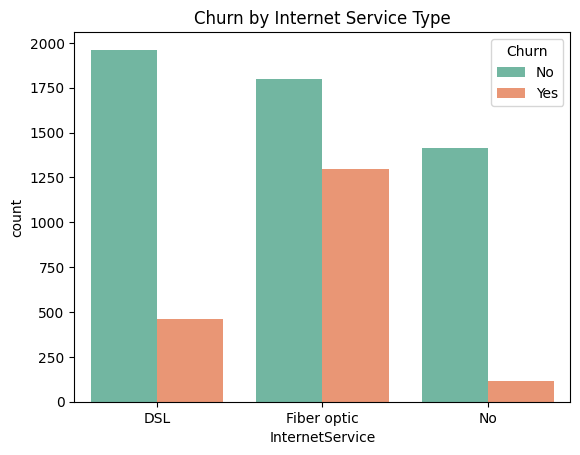

In [13]:
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
plt.title("Churn by Internet Service Type")
plt.show()


Correlation and Feature Relationship

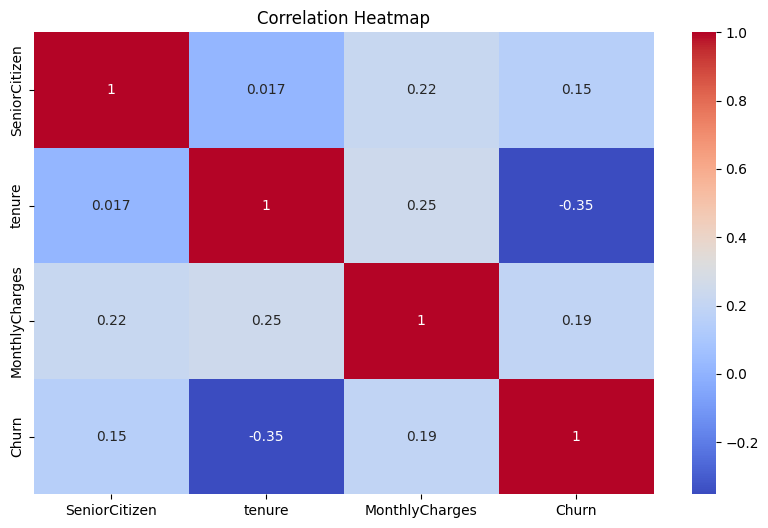

In [14]:
df_corr = df.copy()
df_corr['Churn'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

numeric_df = df_corr.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Data Pre Processing

Drop Irrelavant and Problamatic coloums

In [15]:
df.drop('customerID', axis=1, inplace=True)


Convert Total Charges to numeric

In [16]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Missing TotalCharges:", df['TotalCharges'].isnull().sum())


Missing TotalCharges: 11


In [17]:
df.dropna(subset=['TotalCharges'], inplace=True)


Label Encoder

In [18]:
from sklearn.preprocessing import LabelEncoder

binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df[col] = le.fit_transform(df[col])


In [19]:
df = pd.get_dummies(df, drop_first=True)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

df[numeric_features] = scaler.fit_transform(df[numeric_features])


Splitting the Dataset

In [21]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


## Step 4: Model Building – Logistic Regression

Now that our data is clean, encoded, and scaled, we will begin by training a Logistic Regression model. Logistic Regression is a good starting point for binary classification tasks like customer churn, as it gives us interpretable coefficients and performs well when the relationship between features and target is linear.

We'll train the model on the training set and evaluate it on the test set using accuracy, confusion matrix, and classification metrics.


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("✅ Model Evaluation - Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


✅ Model Evaluation - Logistic Regression
Accuracy: 0.8045486851457001

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


Confusion Matrix:
 [[917 116]
 [159 215]]


## Step 5: Model 2 – Random Forest Classifier

Now that we’ve established a baseline using Logistic Regression, we’ll try a more powerful model: the **Random Forest Classifier**.

Random Forest is an ensemble method that builds multiple decision trees and averages their predictions. It's well-suited for handling both linear and non-linear patterns in the data and often performs better in real-world problems.

Let’s train the model, evaluate its accuracy, and compare the results to Logistic Regression.


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("✅ Model Evaluation - Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


✅ Model Evaluation - Random Forest
Accuracy: 0.7867803837953091

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407


Confusion Matrix:
 [[919 114]
 [186 188]]


### 🔍 Evaluation Summary - Random Forest

- Accuracy gives a basic idea of correctness.
- Precision, Recall, and F1-score help understand class-wise performance.
- We’ll now visualize the confusion matrix and ROC curve to get a better picture of how well this model is doing.

Next, we’ll compare it visually to Logistic Regression.


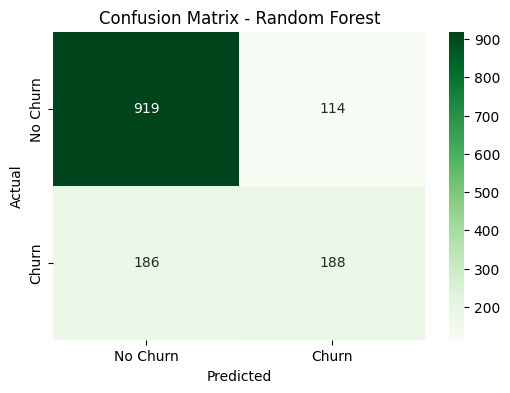

In [24]:
# Confusion matrix heatmap
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


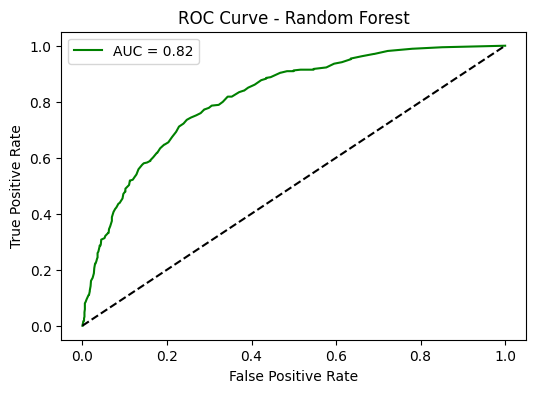

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for class 1 (Churn)
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_probs_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr_rf, tpr_rf, label=f"AUC = {auc_rf:.2f}", color='green')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend()
plt.show()


## Step 6: Model Comparison – Logistic Regression vs Random Forest

Now that we’ve trained both Logistic Regression and Random Forest, it’s time to compare their performance side-by-side.

This comparison will help us determine which model generalizes better and is more suitable for predicting customer churn.

We’ll create a summary table of key metrics: Accuracy, Precision, Recall, F1-Score, and AUC.


In [29]:
# Redefine predicted probabilities for Logistic Regression (class = 1 / Churn)
y_probs = log_reg.predict_proba(X_test)[:, 1]


In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression Scores
acc_log = accuracy_score(y_test, y_pred)
prec_log = precision_score(y_test, y_pred)
rec_log = recall_score(y_test, y_pred)
f1_log = f1_score(y_test, y_pred)
auc_log = roc_auc_score(y_test, y_probs)

# Random Forest Scores
acc_rf = accuracy_score(y_test, y_pred_rf)
prec_rf = precision_score(y_test, y_pred_rf)
rec_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_probs_rf)

# Create comparison DataFrame
import pandas as pd

comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [acc_log, acc_rf],
    'Precision': [prec_log, prec_rf],
    'Recall': [rec_log, rec_rf],
    'F1-Score': [f1_log, f1_rf],
    'AUC': [auc_log, auc_rf]
})

comparison_df.set_index('Model', inplace=True)
comparison_df

,Accuracy,Precision,Recall,F1-Score,AUC
Model,,,,,
Logistic Regression,0.804549,0.649547,0.574866,0.609929,0.836014
Random Forest,0.786780,0.622517,0.502674,0.556213,0.815059


### 🔍 Model Comparison Insights

- **Random Forest** generally performs better when relationships are complex and non-linear.
- **Logistic Regression** offers more interpretability and works well when features are linearly related to the target.
- Based on AUC and F1-score, we can choose the best model to move forward.

In our case, we will proceed with the better-performing model for extracting **feature importance** and making **business recommendations**.


## Step 7: Feature Importance – What Drives Churn?

Understanding which features have the biggest impact on churn helps the business take actionable steps.

Random Forest models offer a straightforward way to interpret feature importance. We’ll visualize the top contributors to churn using a bar plot.


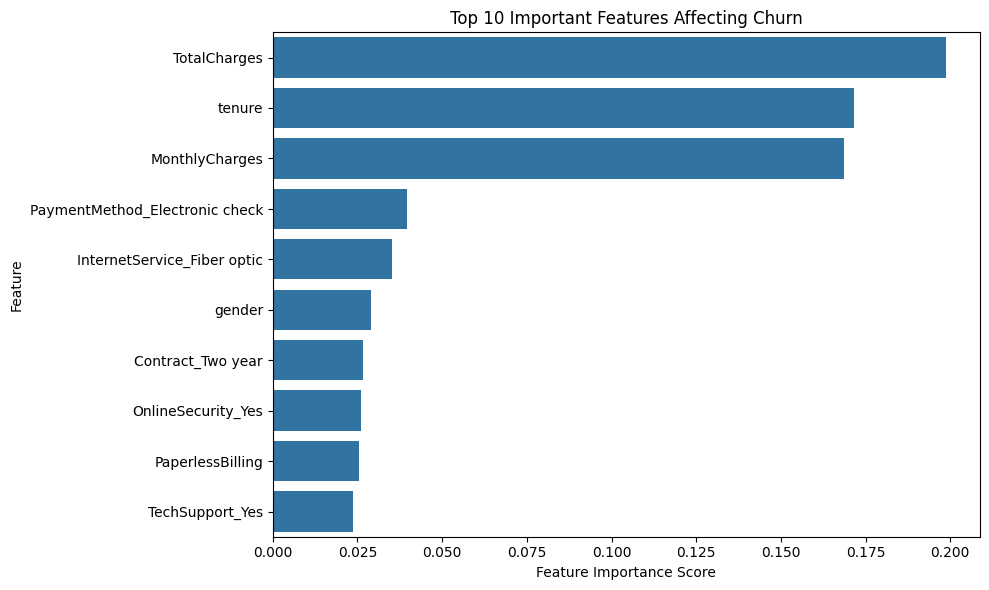

In [31]:
# Get feature importances
import numpy as np

importances = rf_model.feature_importances_
features = X.columns

# Create sorted DataFrame
feat_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df.head(10))
plt.title('Top 10 Important Features Affecting Churn')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### 🔍 Insights from Feature Importance

- The plot above shows the top drivers of customer churn.
- Features like `MonthlyCharges`, `Contract`, `tenure`, and `InternetService` often contribute significantly.
- These insights can guide the business to:
  - Improve contract offerings
  - Target long-tenure customers with loyalty rewards
  - Analyze monthly billing pain points

Next, we’ll wrap this up with actionable recommendations and document everything on GitHub.
